## Load a model

In [3]:
import torch
from model import *

elo_or_year = 2010

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # using cuda
print("Device:", device)

model = Neuro_gambit().to(device)
print('Model initalized')

model.load_state_dict(torch.load('./models/'+str(model._get_name())+'_'+str(elo_or_year)+'.pt')) # it takes the loaded dictionary, not the path file itself
model.eval()
model.to(device)
print('Model loaded')

Device: cuda
Model initalized
Model loaded


## Playing a game

### AI vs User

e4 c5 Bc4 Nc6 Nf3 e6
Last AI move: e6 {'move': 'e7e6', 'prob': 0.0012740006992367169, 'prob_values': [0.15080681443214417, 0.24211503565311432, 0.14724789559841156, 0.23696152865886688]}


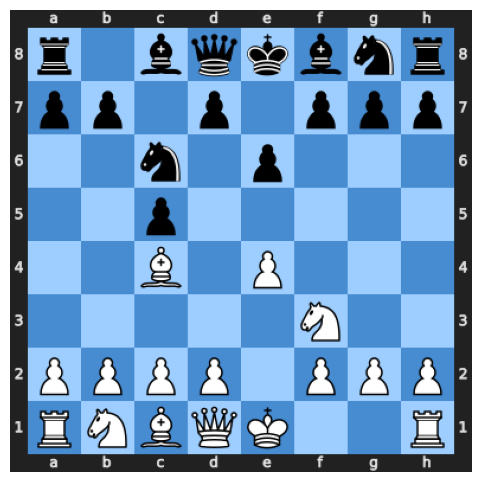

InvalidMoveError: invalid san: ''

In [4]:
# Playing a game
from model import get_best_move
import chess
import chess.svg
import matplotlib.pyplot as plt
from cairosvg import svg2png
import cv2
from IPython.display import clear_output

def draw_board(current_board, ai_col_chess):
    """Draw board

    Keyword arguments:
    current_board -- chess.Board()
    from https://colab.research.google.com/github/iAmEthanMai/chess-engine-model/blob/main/python_chess_engine.ipynb#scrollTo=yveIUxzjUr2b
    """
    board_img = chess.svg.board(current_board, flipped=ai_col_chess==chess.WHITE)
    svg2png(bytestring=board_img,write_to='./boards/board.png')
    img = cv2.imread('./boards/board.png', 1)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axis('off')
    plt.imshow(img)


def get_algebraic_notation(move_stack):
    board = chess.Board()
    algebraic_moves = []
    
    for move in move_stack:
        algebraic_moves.append(board.san(move))
        board.push(move)
    
    return algebraic_moves


board = chess.Board()
ai_col = 'black'
ai_col_chess = chess.BLACK if ai_col == 'black' else chess.WHITE
last = None
while not board.is_game_over():
    # render game
    clear_output()
    alg_move_stack = get_algebraic_notation(board.move_stack)
    print(" ".join(alg_move_stack))
    print("Last AI move:", alg_move_stack[-1] if alg_move_stack != [] else '', last)
    draw_board(board, ai_col_chess)
    plt.show()

    # handle moves
    if board.turn == ai_col_chess:
        move_prob = get_best_move(model, board, ai_col)
        last = move_prob
        board.push_uci(move_prob['move'])
    else:
        try:
            user_input = input() # your input in algebraic
            board.push_san(user_input)
        except chess.IllegalMoveError:
            print('Illegal move:', user_input)
print('Winner:', 'white' if board.turn == chess.BLACK else 'black')


### AI vs AI

In [ ]:
from model import get_best_move
import chess

def get_algebraic_notation(move_stack):
    board = chess.Board()
    algebraic_moves = []
    
    for move in move_stack:
        algebraic_moves.append(board.san(move))
        board.push(move)
    
    return algebraic_moves


board = chess.Board()
# ai_col_chess = chess.BLACK if ai_col == 'black' else chess.WHITE
last = None
while not board.is_game_over():
    # handle moves
    move_prob = get_best_move(model, board, 'black' if board.turn == chess.BLACK else "white")
    last = move_prob
    board.push_uci(move_prob['move'])
alg_move_stack = get_algebraic_notation(board.move_stack)
print(len(alg_move_stack))
print(" ".join(alg_move_stack))